In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
def plot_degree_dist(G, loglog=False):
    all_degrees = dict(G.degree).values()
    unique_degrees = list(set(all_degrees))
    
    degree_count = []
    for i in unique_degrees:
        x = list(all_degrees).count(i)
        degree_count.append(x)
        
    if loglog:    
        plt.loglog(unique_degrees, degree_count, 'bo')
    else:
        plt.plot(unique_degrees, degree_count, 'bo')
        
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()

# Facebook

## Dataset Information
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks. Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent. 

## Files:

nodeId.edges : The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

nodeId.circles : The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

nodeId.feat : The features for each of the nodes that appears in the edge file.

nodeId.egofeat : The features for the ego user.

nodeId.featnames : The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

In [3]:
# https://snap.stanford.edu/data/egonets-Facebook.html
FBCOMB = nx.read_edgelist('./data/facebook_combined.txt.gz')

In [4]:
print(nx.info(FBCOMB))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [5]:
nx.number_of_nodes(FBCOMB)

4039

In [6]:
nx.number_of_edges(FBCOMB)

88234

In [7]:
nx.is_directed(FBCOMB)

False

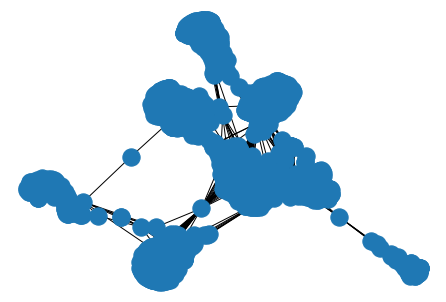

In [8]:
nx.draw(FBCOMB)

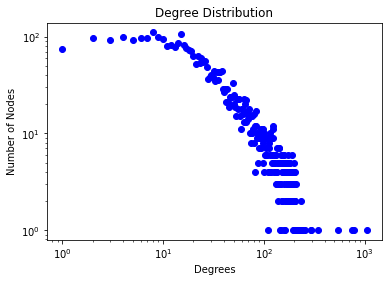

In [9]:
plot_degree_dist(FBCOMB, True)

In [10]:
nx.density(FBCOMB)

0.010819963503439287

In [11]:
FBOK = nx.read_adjlist('./data/facebook.tar.gz')

In [12]:
print(nx.info(FBOK))

Name: 
Type: Graph
Number of nodes: 4185
Number of edges: 101155
Average degree:  48.3417


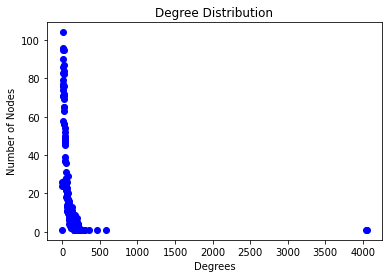

In [13]:
plot_degree_dist(FBOK)

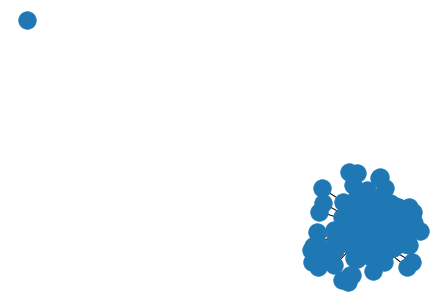

In [14]:
nx.draw(FBOK)

# Football

In [15]:
# http://vlado.fmf.uni-lj.si/pub/networks/data/sport/football.html
FTBL = nx.read_pajek('./data/football.net')

Our network example describes the 22 soccer teams which participated in the World Championship in Paris, 1998.

Players of the national team often have contracts in other countries. This constitutes a players market where national teams export players to other countries. Members of the 22 teams had contracts in altogether 35 countries.

Counting which team exports how many players to which country can be described with a valued, asymmetric graph. The graph is highly unsymmetric: some countries only export players, some countries are only importers. 

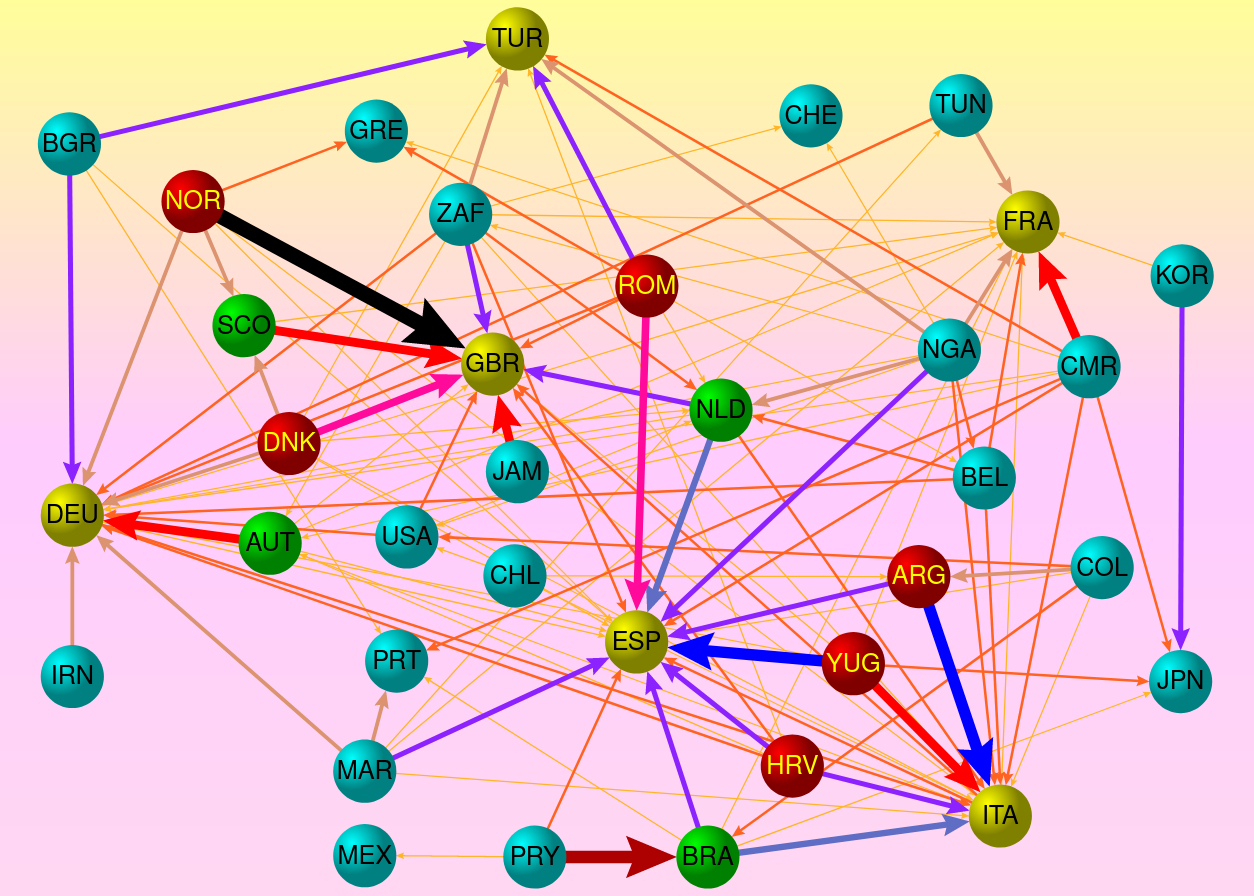

In [16]:
Image("../images/football.png")

In [17]:
print(nx.info(FTBL))

Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714


FTBL is directed because the in/out degree info

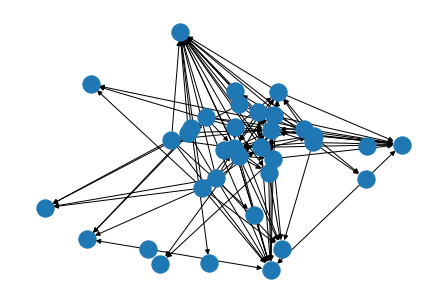

In [18]:
nx.draw(FTBL)
plt.show()

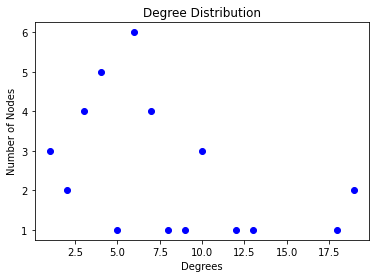

In [19]:
plot_degree_dist(FTBL)

In [20]:
nx.density(FTBL)

0.09915966386554621

# Zachary's Karate club

This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers. 

In [21]:
# http://konect.cc/networks/ucidata-zachary/
ZKRC = nx.read_pajek('./data/karate.paj')

In [22]:
print(nx.info(ZKRC))

Name: 
Type: MultiGraph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


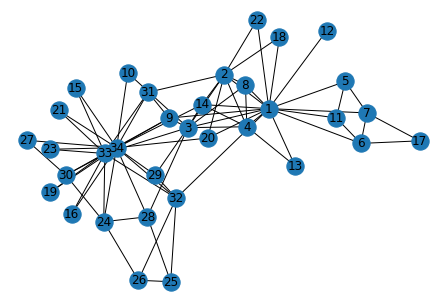

In [23]:
nx.draw(ZKRC, with_labels=True)
plt.show()

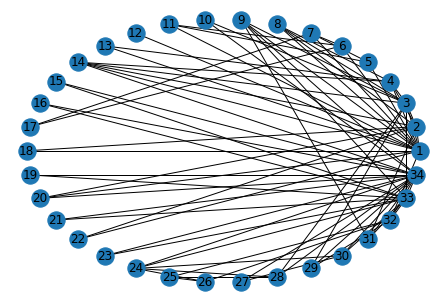

In [24]:
nx.draw_circular(ZKRC, with_labels=True)
plt.show()

In [25]:
ZKRC.degree

MultiDegreeView({'1': 16, '2': 9, '3': 10, '4': 6, '5': 3, '6': 4, '7': 4, '8': 4, '9': 5, '10': 2, '11': 3, '12': 1, '13': 2, '14': 5, '15': 2, '16': 2, '17': 2, '18': 2, '19': 2, '20': 3, '21': 2, '22': 2, '23': 2, '24': 5, '25': 3, '26': 3, '27': 2, '28': 4, '29': 3, '30': 4, '31': 4, '32': 6, '33': 12, '34': 17})

In [26]:
list(set(dict(ZKRC.degree).values()))

[1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17]

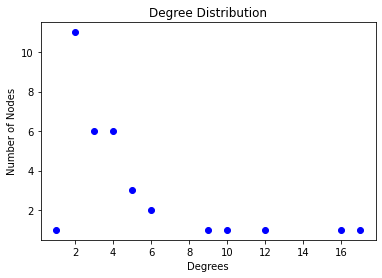

In [27]:
plot_degree_dist(ZKRC)

In [28]:
nx.density(ZKRC)

0.13903743315508021

# Wikipedia

This is a web graph of Wikipedia hyperlinks collected in September 2011. The network was constructed by first taking the largest strongly connected component of Wikipedia, then restricting to pages in the top set of categories (those with at least 100 pages), and finally taking the largest strongly connected component of the restricted graph.

In addition to the graph, we also provide the page names of the articles and the categories of the articles. The categories can serve as "ground-truth" communities. The categories are overlapping as each article may be classified into several categories.

In [29]:
WKPD = nx.read_adjlist('./data/wiki-topcats-categories.txt.gz')

In [30]:
print(nx.info(WKPD))

Name: 
Type: Graph
Number of nodes: 1808853
Number of edges: 4759526
Average degree:   5.2625
